# Iris plant classification

Following are the steps which we're going to cover:
1. Import libraries
2. Load dataset
3. Summarize dataset
4. Visualize dataset
5. Evaluate algorithms
6. Make predictions

## 1. Import libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 2. Load dataset

In [9]:
dataset = pd.read_csv('iris.csv', header=None, names=['sepal-length','sepal-width','petal-length','petal-width','class'])

## 3. Summarize dataset

### 3.1 Dimensions of data

In [12]:
dataset.shape

(150, 5)

### 3.2 Peek at the data

In [13]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 3.3 Statistical summary

In [10]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 3.4 Class-wise summary

In [14]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## 4. Data visualization
We now have a basic idea about the dataset

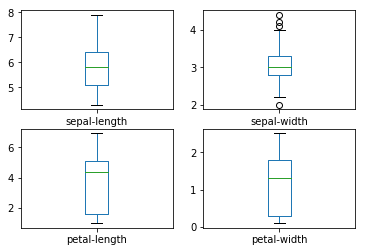

In [19]:
dataset.plot(kind='box', subplots=True,layout=(2,2),sharex=False, sharey=False)
plt.show()

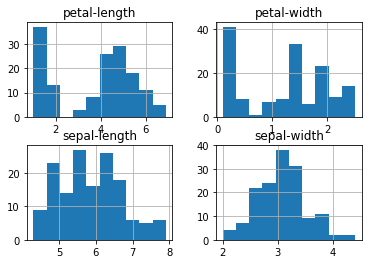

In [21]:
dataset.hist()
plt.show()

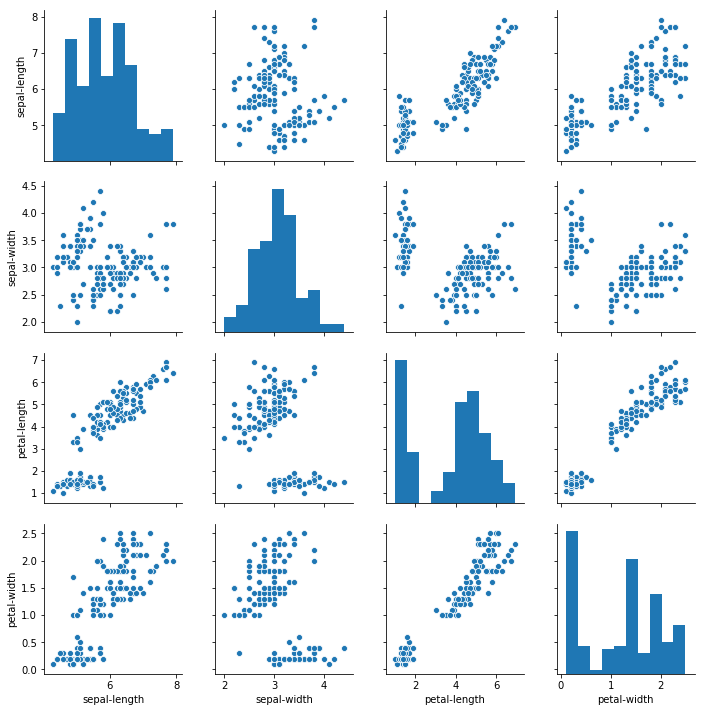

In [22]:
sns.pairplot(dataset)

## Evaluate algorithms

### 5.1 Split into train and validation set

In [32]:
array = dataset.values

X = array[:,:-1]
y = array[:,-1]

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### 5.2 Test harness
We will use 10-fold cross validation to estimate accuracy. 
In this, we train on 9 parts and test on 1 part and repeat for all combinations of train-test splits. 

In [34]:
# Test options and metric=accuracy
seed = 7
scoring="accuracy"

We are using the metric of `accuracy` to evaluate models. This is a **ratio** of the **number of correctly predicted instances** in **divided** by the **total number of instances** in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

### 5.3 Build models
Let’s evaluate 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

In [37]:
# Add algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.932727 (0.074877)
LDA: 0.971818 (0.059259)
KNN: 0.951818 (0.065813)
CART: 0.942727 (0.062065)
NB: 0.943636 (0.061496)
SVM: 0.970000 (0.064031)


C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


### 5.4 Plot results of each model

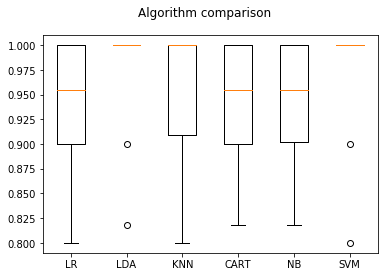

In [38]:
fig = plt.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 6. Prediction using best model

### 6.1 KNeighbors Classification alorithm

In [39]:
# Take KNN algorithm

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9777777777777777
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.98      0.98      0.98        45



We can see accuracy of KNN algorithm on validation dataset is ~97.78% compared to Training dataset(~95.18%).  
Confusion matrix shows it made only 1 error. 

### 6.2 Linear Discriminant Analysis

In [40]:
# Take LDA algorithm

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_predict_lda = lda.predict(X_test)

print(accuracy_score(y_test, y_predict_lda))
print(confusion_matrix(y_test, y_predict_lda))
print(classification_report(y_test, y_predict_lda))

0.9777777777777777
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.98      0.98      0.98        45



### 6.3 Logistic Regression

In [43]:
# Take Logistics regression

lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)

print(accuracy_score(y_test, y_predict_lr))
print(confusion_matrix(y_test, y_predict_lr))
print(classification_report(y_test, y_predict_lr))

0.8888888888888888
[[16  0  0]
 [ 0 13  5]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.72      0.84        18
 Iris-virginica       0.69      1.00      0.81        11

    avg / total       0.92      0.89      0.89        45



### 6.4 Decision tree classifier

In [42]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
y_predict_cart = cart.predict(X_test)

print(accuracy_score(y_test, y_predict_cart))
print(confusion_matrix(y_test, y_predict_cart))
print(classification_report(y_test, y_predict_cart))

0.9777777777777777
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.98      0.98      0.98        45



### 6.5 Gaussion Naive Baye's algorithm

In [44]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_predict_nb = nb.predict(X_test)

print(accuracy_score(y_test, y_predict_nb))
print(confusion_matrix(y_test, y_predict_nb))
print(classification_report(y_test, y_predict_nb))

1.0
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

    avg / total       1.00      1.00      1.00        45



### 6.6 Support Vector machines

In [45]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(X_test)

print(accuracy_score(y_test, y_predict_svc))
print(confusion_matrix(y_test, y_predict_svc))
print(classification_report(y_test, y_predict_svc))

0.9777777777777777
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.98      0.98      0.98        45



### Results

Out of all algorithms, Gaussian Naive Baye's algorithm stands out as it has accuracy score of 100%.